<a href="https://colab.research.google.com/github/MohamedFAR00K/Farook/blob/main/BRINJAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 '/content/drive/MyDrive/Dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,

)

Found 5790 files belonging to 1 classes.


In [ ]:
class_names=images_dataset.class_names
class_names

['brinjalleaf']

In [ ]:
len(images_dataset)

181

In [ ]:
for image_batch,label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())

[[[111. 100.  96.]
  [110.  99.  95.]
  [110.  99.  95.]
  ...
  [166. 155. 151.]
  [157. 146. 142.]
  [154. 143. 139.]]

 [[112. 101.  97.]
  [106.  95.  91.]
  [122. 111. 107.]
  ...
  [158. 147. 143.]
  [155. 144. 140.]
  [165. 154. 150.]]

 [[134. 123. 119.]
  [109.  98.  94.]
  [116. 105. 101.]
  ...
  [167. 156. 152.]
  [155. 144. 140.]
  [153. 142. 138.]]

 ...

 [[114. 103. 101.]
  [123. 112. 110.]
  [131. 120. 118.]
  ...
  [155. 147. 145.]
  [143. 135. 133.]
  [154. 146. 144.]]

 [[118. 107. 105.]
  [120. 109. 107.]
  [120. 109. 107.]
  ...
  [108. 100.  98.]
  [106.  98.  96.]
  [103.  95.  93.]]

 [[123. 112. 110.]
  [118. 107. 105.]
  [118. 107. 105.]
  ...
  [ 96.  88.  86.]
  [117. 109. 107.]
  [102.  94.  92.]]]


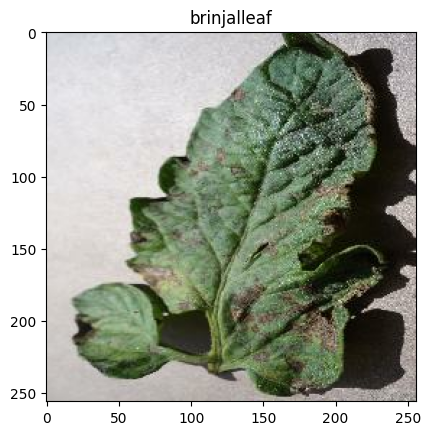

In [ ]:
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])

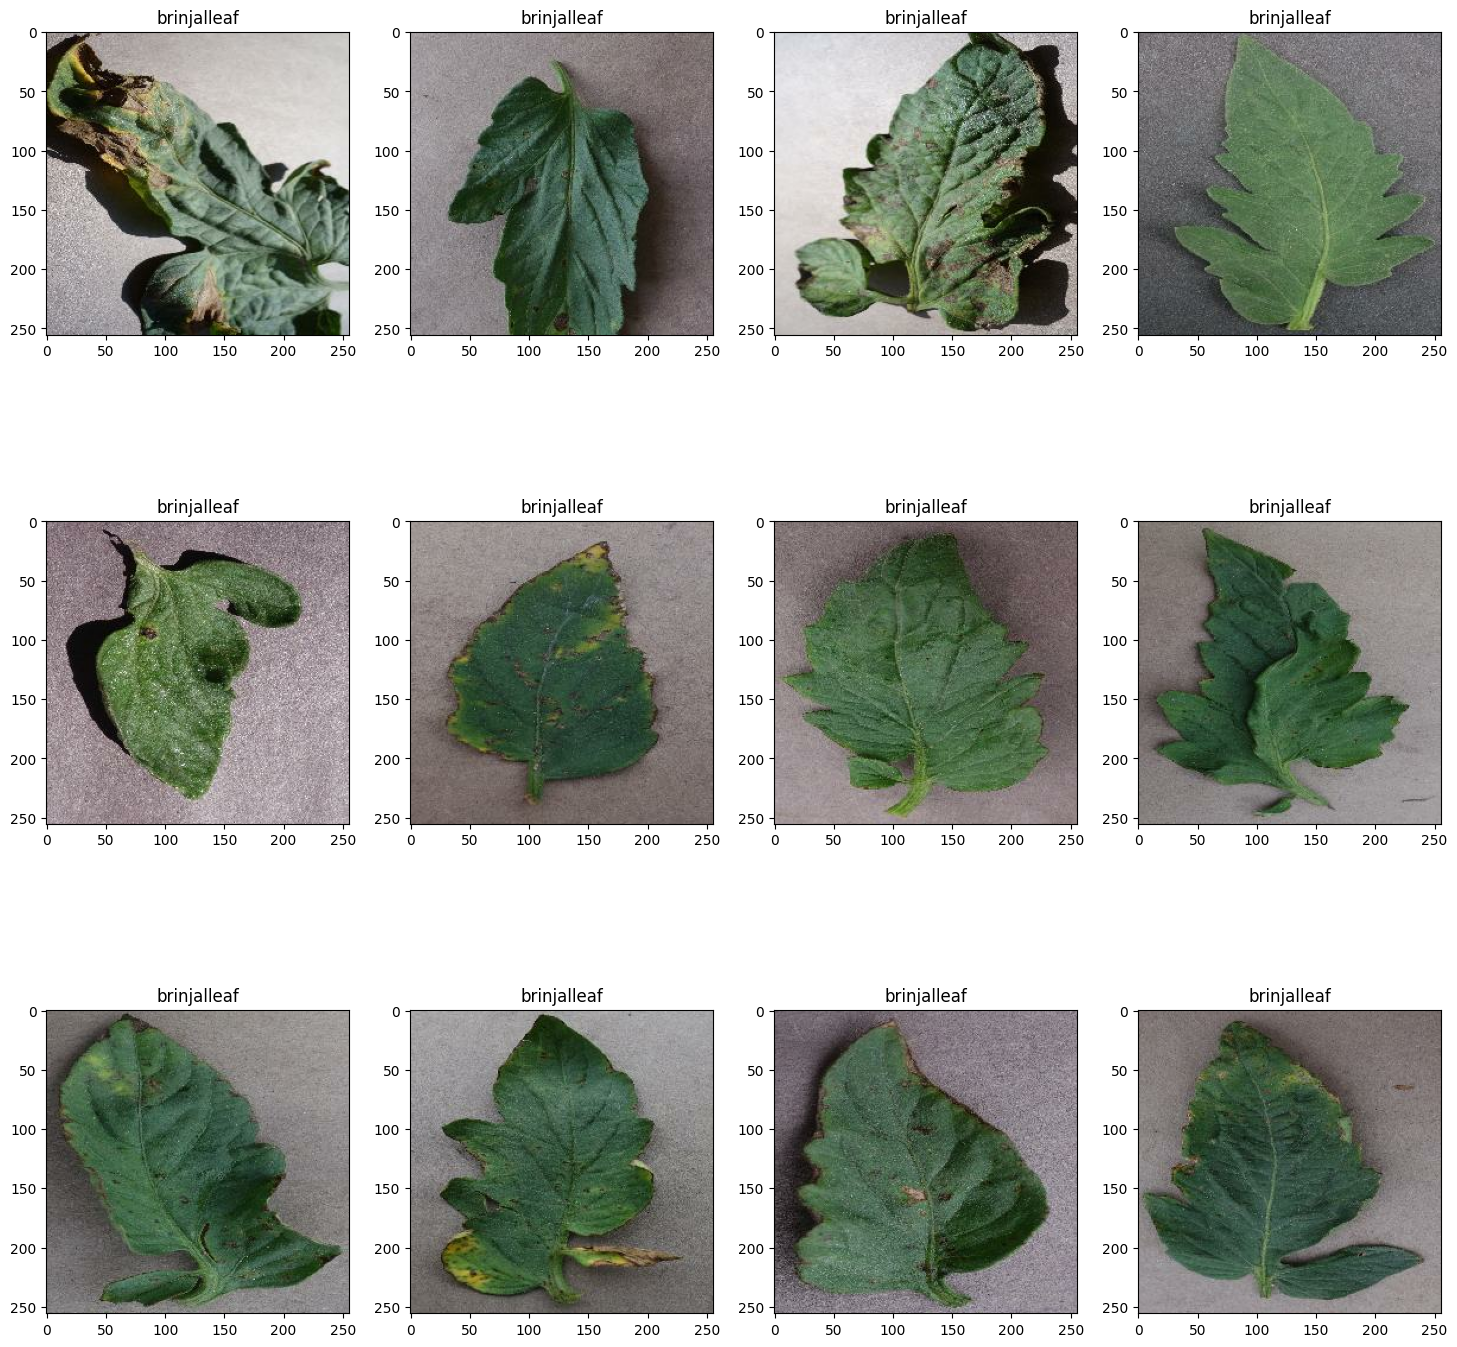

In [ ]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])


In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [ ]:
print(len(train_ds),len(val_ds),len(test_ds))

144 18 19


In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([

    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False ),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/2
144/144 [==============================] - 342s 2s/step - loss: 0.0434 - accuracy: 0.9928 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
144/144 [==============================] - 300s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
history

NameError: ignored

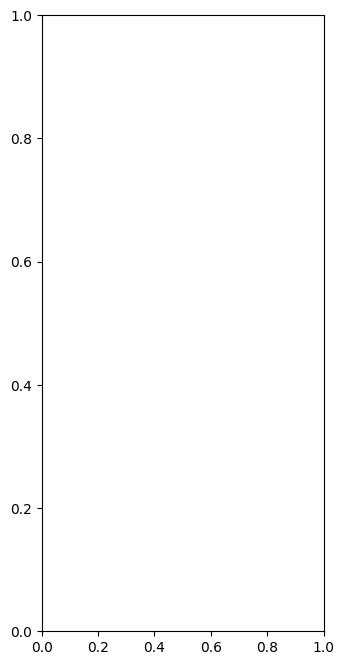

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
